In [3]:
## library
import torch
torch.manual_seed(10)
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from sklearn import decomposition
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import nltk
#Import stopwords
#from nltk.corpus import stopwords
import esm


alphabet_list = ['', '', '', '', 
                   'L', 'A', 'G', 'V', 
                   'S', 'E', 'R', 'T', 
                   'I', 'D', 'P', 'K',
                   'Q', 'N', 'F', 'Y',
                   'M', 'H', 'W', 'C', 
                   'X', 'B', 'U', 'Z', 
                   'O', '.', '-', '<null_1>', '']

In [4]:
model_t36, alphabet = esm.pretrained.esm2_t36_3B_UR50D()
model_t36.eval()
model_t33, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
model_t33.eval()

ESM2(
  (embed_tokens): Embedding(33, 1280, padding_idx=1)
  (layers): ModuleList(
    (0): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=1280, out_features=5120, bias=True)
      (fc2): Linear(in_features=5120, out_features=1280, bias=True)
      (final_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    )
    (1): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
        (v_proj): Linear(in_features=1280, out_features=1280, bia

In [11]:
print(model_t36.embed_tokens.weight.shape)
print(model_t33.embed_tokens.weight.shape)

torch.Size([33, 2560])
torch.Size([33, 1280])


In [15]:
embed_tokens_t36 = []
embed_tokens_t33 = []
## for t36 embed
for s_token in model_t36.embed_tokens.weight[4:32]:
    embed_tokens_t36.append(s_token.cpu().detach().numpy())

embed_tokens_t36 = np.array(embed_tokens_t36)

## for t33 embed
for s_token in model_t33.embed_tokens.weight[4:32]:
    embed_tokens_t33.append(s_token.cpu().detach().numpy())
    
embed_tokens_t33 = np.array(embed_tokens_t33)

In [16]:
from sklearn.manifold import TSNE
n_components = 2

# t-sne 모델 생성
tsne_model = TSNE(n_components=n_components, n_iter = 5000, perplexity = 3)

# 학습한 결과 2차원 공간 값 출력
tsne_t36 = tsne_model.fit_transform(embed_tokens_t36)
tsne_t33 = tsne_model.fit_transform(embed_tokens_t33)


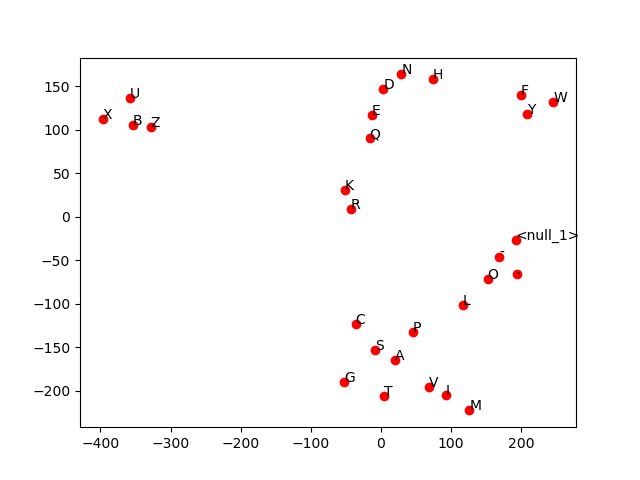

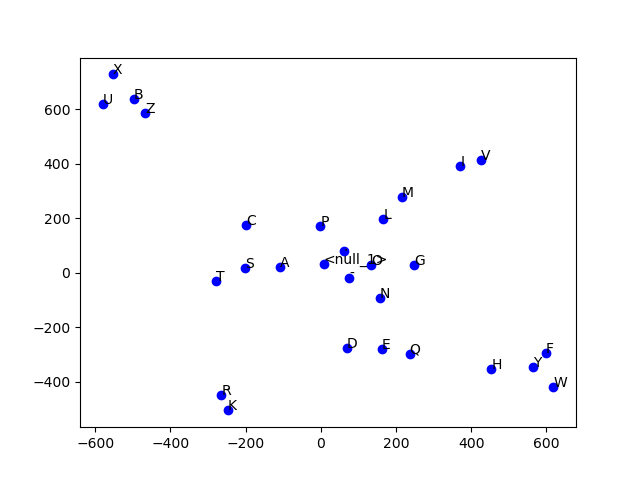

In [17]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
%matplotlib widget

tsne_t36_rep = pd.DataFrame({'x': tsne_t36[:, 0], 'y':tsne_t36[:, 1], 'classes' : "t36"})
tsne_t33_rep = pd.DataFrame({'x': tsne_t33[:, 0], 'y':tsne_t33[:, 1], 'classes' : "t33"})

fig_t36, ax_t36 = plt.subplots()
ax_t36.scatter(tsne_t36_rep['x'], tsne_t36_rep['y'], c = "red")

for i, txt in enumerate(alphabet_list[4:32]):
    ax_t36.annotate(txt, (tsne_t36_rep['x'][i], tsne_t36_rep['y'][i]))
    
fig_t33, ax_t33 = plt.subplots()
ax_t33.scatter(tsne_t33_rep['x'], tsne_t33_rep['y'], c = "blue")

for i, txt in enumerate(alphabet_list[4:32]):
    ax_t33.annotate(txt, (tsne_t33_rep['x'][i], tsne_t33_rep['y'][i]))

In [18]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=4)
pca_t36 = pca_model.fit_transform(embed_tokens_t36)
pca_t36 = pd.DataFrame(data = pca_t36)

pca_model = PCA(n_components=4)
pca_t33 = pca_model.fit_transform(embed_tokens_t33)
pca_t33 = pd.DataFrame(data = pca_t33)

## T-SNE
n_components = 2

# t-sne 모델 생성
tsne_model = TSNE(n_components=n_components, n_iter = 5000, perplexity = 3)

# 학습한 결과 2차원 공간 값 출력
tsne_t36 = tsne_model.fit_transform(pca_t36)
tsne_t33 = tsne_model.fit_transform(pca_t33)


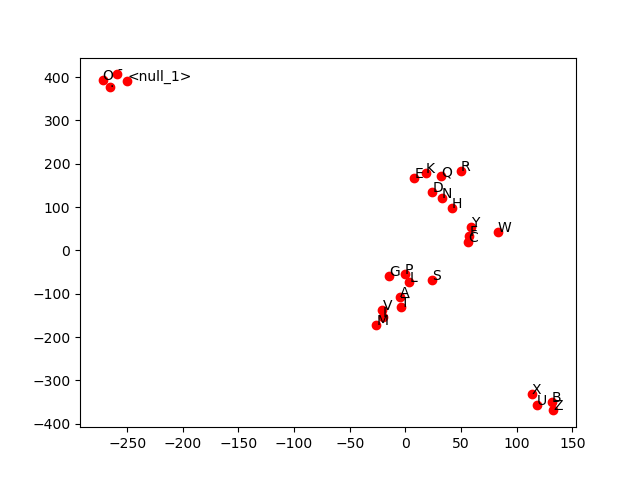

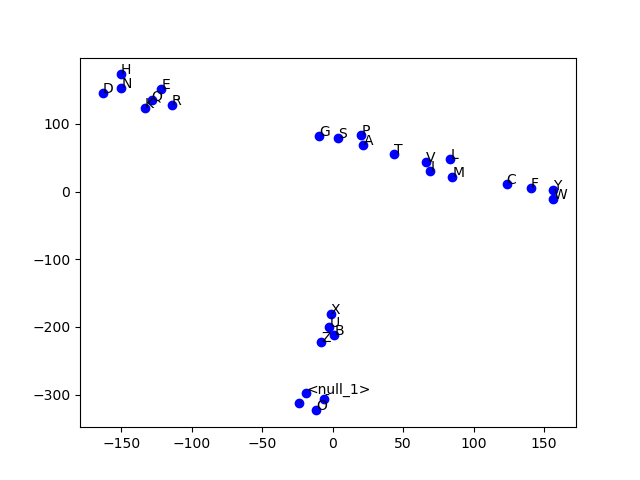

In [19]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
%matplotlib widget

tsne_t36_rep = pd.DataFrame({'x': tsne_t36[:, 0], 'y':tsne_t36[:, 1], 'classes' : "t36"})
tsne_t33_rep = pd.DataFrame({'x': tsne_t33[:, 0], 'y':tsne_t33[:, 1], 'classes' : "t33"})

fig_t36, ax_t36 = plt.subplots()
ax_t36.scatter(tsne_t36_rep['x'], tsne_t36_rep['y'], c = "red")

for i, txt in enumerate(alphabet_list[4:32]):
    ax_t36.annotate(txt, (tsne_t36_rep['x'][i], tsne_t36_rep['y'][i]))
    
fig_t33, ax_t33 = plt.subplots()
ax_t33.scatter(tsne_t33_rep['x'], tsne_t33_rep['y'], c = "blue")

for i, txt in enumerate(alphabet_list[4:32]):
    ax_t33.annotate(txt, (tsne_t33_rep['x'][i], tsne_t33_rep['y'][i]))

In [97]:
pca_t33.iloc[[0]]

,0,1,2,3
0,0.30601,1.004506,0.67352,0.792958
